In [1]:
# !pip install pandas numpy nltk spacy seaborn matplotlib

In [2]:
# -------------------------------
# BASIC & INTERMEDIATE PREPROCESSING
# -------------------------------

import pandas as pd
import numpy as np
import re
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# -------------------------------
# 1. Load & Explore Data
# -------------------------------
data = pd.DataFrame({
    'text': [
        "Natural Language Processing is fun! 😊",
        "I can't believe it's already 2025...",
        "Python is great for NLP and Data Analysis.",
        "AI will change the world."
    ]
})

print("Initial Data:")
print(data)


Initial Data:
                                         text
0       Natural Language Processing is fun! 😊
1        I can't believe it's already 2025...
2  Python is great for NLP and Data Analysis.
3                   AI will change the world.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# -------------------------------
# 2. Lowercasing
# -------------------------------
data['lower'] = data['text'].str.lower()


In [4]:
# -------------------------------
# 3. Removing Punctuation & Numbers
# -------------------------------
data['no_punct'] = data['lower'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
data['no_num'] = data['no_punct'].apply(lambda x: re.sub(r'\d+', '', x))



In [5]:
# -------------------------------
# 4. Tokenization
# -------------------------------
data['tokens'] = data['no_num'].apply(word_tokenize)


In [6]:
# -------------------------------
# 5. Stopword Removal
# -------------------------------
stop_words = set(stopwords.words('english'))
data['no_stopwords'] = data['tokens'].apply(lambda x: [w for w in x if w not in stop_words])


In [7]:
# -------------------------------
# 6. Lemmatization
# -------------------------------
lemmatizer = WordNetLemmatizer()
data['lemmatized'] = data['no_stopwords'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])


In [8]:
# -------------------------------
# 7. Stemming
# -------------------------------
stemmer = PorterStemmer()
data['stemmed'] = data['no_stopwords'].apply(lambda x: [stemmer.stem(w) for w in x])


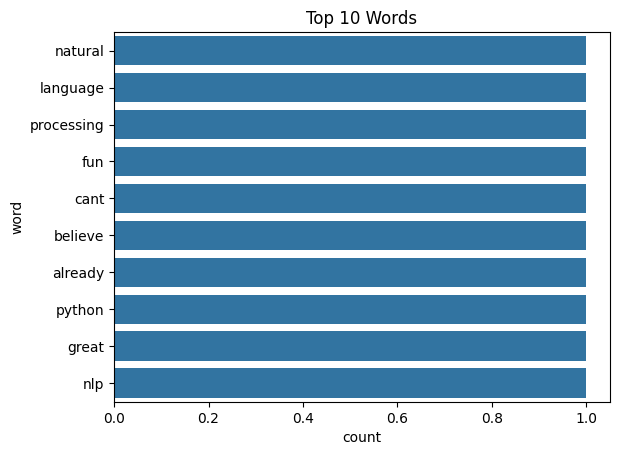

,text,lower,no_punct,no_num,tokens,no_stopwords,lemmatized,stemmed
0,Natural Language Processing is fun! 😊,natural language processing is fun! 😊,natural language processing is fun,natural language processing is fun,"[natural, language, processing, is, fun]","[natural, language, processing, fun]","[natural, language, processing, fun]","[natur, languag, process, fun]"
1,I can't believe it's already 2025...,i can't believe it's already 2025...,i cant believe its already 2025,i cant believe its already,"[i, cant, believe, its, already]","[cant, believe, already]","[cant, believe, already]","[cant, believ, alreadi]"
2,Python is great for NLP and Data Analysis.,python is great for nlp and data analysis.,python is great for nlp and data analysis,python is great for nlp and data analysis,"[python, is, great, for, nlp, and, data, analy...","[python, great, nlp, data, analysis]","[python, great, nlp, data, analysis]","[python, great, nlp, data, analysi]"
3,AI will change the world.,ai will change the world.,ai will change the world,ai will change the world,"[ai, will, change, the, world]","[ai, change, world]","[ai, change, world]","[ai, chang, world]"


In [9]:
# -------------------------------
# 8. Visualization: Word Frequency
# -------------------------------
all_words = [word for tokens in data['no_stopwords'] for word in tokens]
word_freq = Counter(all_words)
word_df = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

sns.barplot(x='count', y='word', data=word_df.head(10))
plt.title("Top 10 Words")
plt.show()

data